# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [14]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

tips["log_net_bill"] = np.log(tips["net_bill"])

tips = sns.load_dataset("tips")

tips["net_bill"] = tips["total_bill"] - tips["tip"]

tips["tip_pct"] = tips["tip"] / tips["net_bill"]


In [2]:
X = sm.add_constant(tips["net_bill"]) 
y = tips["tip_pct"]

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.52e-06
Time:                        21:10:50   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.023     13.166      0.0

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [4]:
tips["log_net_bill"] = np.log(tips["net_bill"])


In [5]:
X_log = sm.add_constant(tips["log_net_bill"])
y = tips["tip_pct"]

model_log = sm.OLS(y, X_log).fit()

print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.62e-13
Time:                        21:13:34   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6181      0.054     11.444   

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [7]:
tips["net_bill_squared"] = tips["net_bill"] ** 2

In [8]:
X_poly = sm.add_constant(tips[["net_bill", "net_bill_squared"]])
y = tips["tip_pct"]

model_poly = sm.OLS(y, X_poly).fit()

print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.06e-09
Time:                        21:15:13   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4851      0.047  

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [9]:
tips_filtered = tips[tips["tip_pct"] > 0].copy()

tips_filtered["log_tip_pct"] = np.log(tips_filtered["tip_pct"])

X_logtip = sm.add_constant(tips_filtered["net_bill"])
y_logtip = tips_filtered["log_tip_pct"]

model_logtip = sm.OLS(y_logtip, X_logtip).fit()

print(model_logtip.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           8.27e-16
Time:                        21:16:25   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2749      0.056    -22.872      0.0

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [10]:
tips_filtered = tips[(tips["tip_pct"] > 0) & (tips["net_bill"] > 0)].copy()

tips_filtered["log_tip_pct"] = np.log(tips_filtered["tip_pct"])
tips_filtered["log_net_bill"] = np.log(tips_filtered["net_bill"])

X = sm.add_constant(tips_filtered["log_net_bill"])
y = tips_filtered["log_tip_pct"]

model_loglog = sm.OLS(y, X).fit()

print(model_loglog.summary())



                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           5.20e-20
Time:                        21:18:20   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3942      0.133     -2.961   

In [11]:
pred_log = model_loglog.fittedvalues

pred_tip_pct = np.exp(pred_log)

R² modelo linear simples: 0.0913
R² modelo log_net_bill: 0.2017
R² modelo polinomial: 0.1576
R² modelo log_tip_pct ~ net_bill: 0.0868
R² modelo log_tip_pct ~ log_net_bill: 0.2277


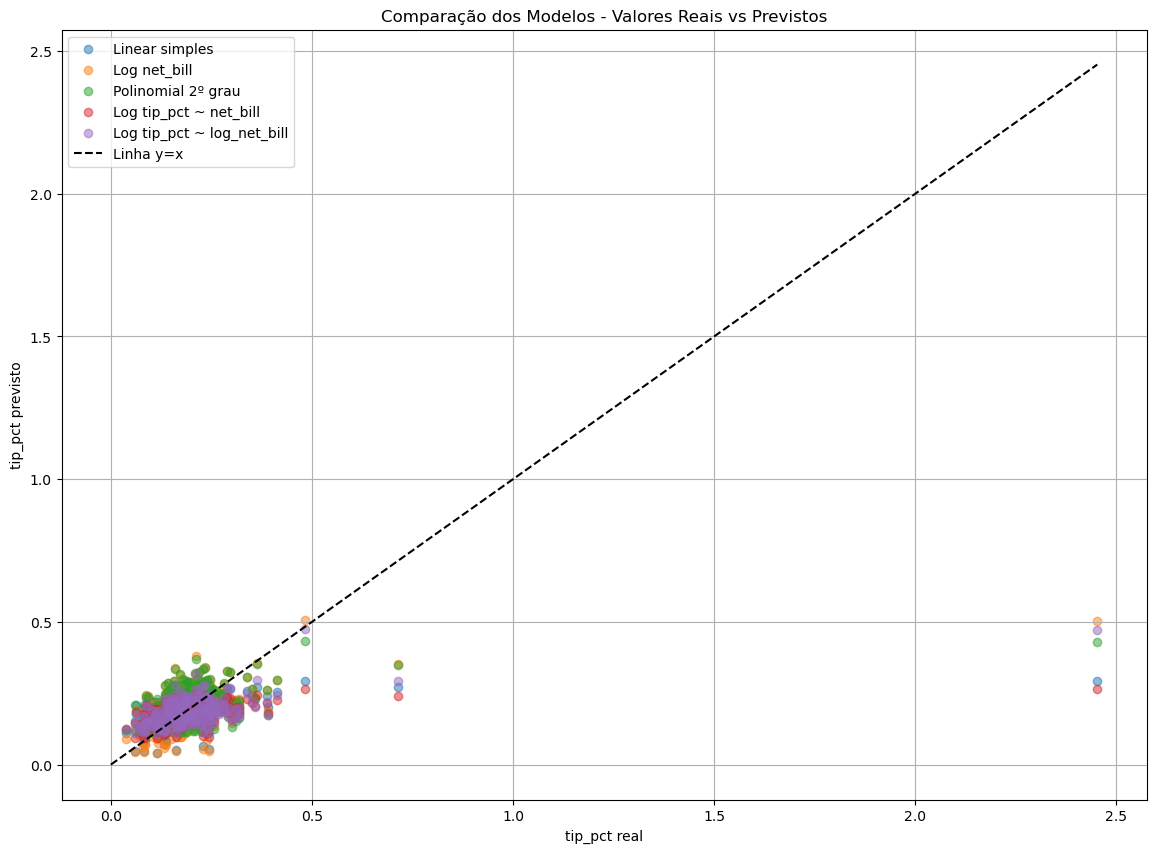

In [15]:
tips_filtered = tips[(tips["tip_pct"] > 0) & (tips["net_bill"] > 0)].copy()

X1 = sm.add_constant(tips_filtered["net_bill"])
model1 = sm.OLS(tips_filtered["tip_pct"], X1).fit()
pred1 = model1.fittedvalues
r2_1 = r2_score(tips_filtered["tip_pct"], pred1)

tips_filtered["log_net_bill"] = np.log(tips_filtered["net_bill"])
X2 = sm.add_constant(tips_filtered["log_net_bill"])
model2 = sm.OLS(tips_filtered["tip_pct"], X2).fit()
pred2 = model2.fittedvalues
r2_2 = r2_score(tips_filtered["tip_pct"], pred2)

tips_filtered["net_bill_squared"] = tips_filtered["net_bill"] ** 2
X3 = sm.add_constant(tips_filtered[["net_bill", "net_bill_squared"]])
model3 = sm.OLS(tips_filtered["tip_pct"], X3).fit()
pred3 = model3.fittedvalues
r2_3 = r2_score(tips_filtered["tip_pct"], pred3)

tips_filtered["log_tip_pct"] = np.log(tips_filtered["tip_pct"])
X4 = sm.add_constant(tips_filtered["net_bill"])
model4 = sm.OLS(tips_filtered["log_tip_pct"], X4).fit()
pred_log4 = model4.fittedvalues
pred4 = np.exp(pred_log4) 
r2_4 = r2_score(tips_filtered["tip_pct"], pred4)

X5 = sm.add_constant(tips_filtered["log_net_bill"])
model5 = sm.OLS(tips_filtered["log_tip_pct"], X5).fit()
pred_log5 = model5.fittedvalues
pred5 = np.exp(pred_log5)  
r2_5 = r2_score(tips_filtered["tip_pct"], pred5)

print(f"R² modelo linear simples: {r2_1:.4f}")
print(f"R² modelo log_net_bill: {r2_2:.4f}")
print(f"R² modelo polinomial: {r2_3:.4f}")
print(f"R² modelo log_tip_pct ~ net_bill: {r2_4:.4f}")
print(f"R² modelo log_tip_pct ~ log_net_bill: {r2_5:.4f}")

plt.figure(figsize=(14, 10))

plt.scatter(tips_filtered["tip_pct"], pred1, alpha=0.5, label="Linear simples")
plt.scatter(tips_filtered["tip_pct"], pred2, alpha=0.5, label="Log net_bill")
plt.scatter(tips_filtered["tip_pct"], pred3, alpha=0.5, label="Polinomial 2º grau")
plt.scatter(tips_filtered["tip_pct"], pred4, alpha=0.5, label="Log tip_pct ~ net_bill")
plt.scatter(tips_filtered["tip_pct"], pred5, alpha=0.5, label="Log tip_pct ~ log_net_bill")

plt.plot([0, max(tips_filtered["tip_pct"])], [0, max(tips_filtered["tip_pct"])], color='black', linestyle='--', label="Linha y=x")

plt.xlabel("tip_pct real")
plt.ylabel("tip_pct previsto")
plt.title("Comparação dos Modelos - Valores Reais vs Previstos")
plt.legend()
plt.grid(True)
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [ ]:
Foi o modelo ~log_tip e ~log_net_bill representado no gráfico pela cor roxa